In [32]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams['axes.unicode_minus'] = False # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline

In [33]:
# 행정구역(주소) 5건만 출력
f = open('./population.csv', 'r', encoding='utf-8') # r: read
data = csv.reader(f, delimiter=',') # delimiter: 구분자
header = next(data) # header
print(type(header))

for i in range(4):  # 
    print(next(data)[0])
        
f.close()

<class 'list'>
서울특별시  (1100000000)
서울특별시 종로구 (1111000000)
서울특별시 종로구 청운효자동(1111051500)
서울특별시 종로구 사직동(1111053000)


In [34]:
# 현재 살고 있는 지역의 정보 출력
f = open('./population.csv', 'r', encoding='utf-8') # r: read
data = csv.reader(f, delimiter=',') # delimiter: 구분자
next(data) # header

for row in data:
    address = row[0] 
    if '영통1동' in address: # == X
        print(row)
        break
        
f.close()

['경기도 수원시 영통구 영통1동(4111757000)', '36,524', '36,524', '302', '328', '358', '372', '437', '415', '394', '452', '455', '433', '452', '534', '570', '505', '449', '490', '538', '502', '506', '546', '511', '478', '500', '519', '507', '523', '471', '492', '514', '490', '478', '545', '549', '517', '554', '506', '590', '632', '683', '640', '710', '615', '689', '715', '685', '722', '846', '780', '845', '754', '708', '681', '600', '576', '612', '516', '505', '515', '457', '463', '401', '313', '292', '226', '200', '194', '158', '179', '113', '119', '119', '104', '120', '95', '106', '93', '88', '105', '98', '85', '74', '86', '71', '69', '47', '40', '42', '30', '23', '25', '22', '10', '9', '11', '2', '6', '3', '5', '3', '1', '6']


In [35]:
# 현재 살고 있는 지역의 순수 인구 정보 0세~ 출력
f = open('./population.csv', 'r', encoding='utf-8') # r: read
data = csv.reader(f, delimiter=',') # delimiter: 구분자
next(data) # header

for row in data:
    address = row[0] 
    if '영동1동' in address: # == X
        for cnt in row[3:]:  # row: list
            print(' ', cnt, end='')
        break
        
f.close()

In [36]:
age = [i for i in range(0, 101)]
print(age)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [37]:
age = [i for i in range(0, 101, 10)]  # min, max, step
print(age)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [38]:
age=[i for i in range(0, 90)]
age = [i for i in range(min(age), max(age), 10)]  # min, max-1, step
print(age)

[0, 10, 20, 30, 40, 50, 60, 70, 80]


In [39]:
age=[i for i in range(0, 90)]
age = [i for i in range(min(age), max(age)+10, 10)]  # min, max-1, step
print(age)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]


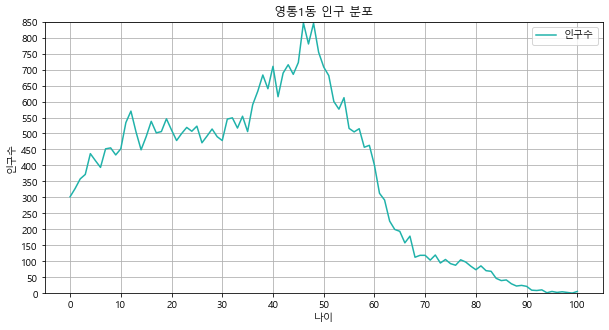

In [40]:
# 현재 살고 있는 지역의 인구 분포를 line chart 출력
f = open('./population.csv', 'r', encoding='utf-8') # r: read
data = csv.reader(f, delimiter=',') # delimiter: 구분자
next(data) # header

y = [] # 순수 인구 정보 저장
for row in data:
    address = row[0] 
    if '영통1동' in address: # == X
        for cnt in row[3:]:  # row: list
            # print(' ', cnt, end='')
            y.append(int(cnt))
        break
        
f.close()

# print(pop1)

x = [i for i in range(0, 101)]   # 0 ~ 100
# [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x_ticks = [i for i in range(min(x), max(x)+10, 10)] # 연령대  
print(x_ticks)

y_ticks = [i for i in range(0, max(y)+50, 50)] #[0, 50, 100, 150, 200, 250, 300, 350...], 인구 정보
print(y_ticks)

plt.figure(figsize=(10, 5))  # 단위: 인치
plt.plot(x, y, c='lightseagreen', label='인구수')
# plt.axis([10, 50, 0, 20]) # x start, x end, y start, y end
plt.ylim(0, max(y))
plt.title('영통1동 인구 분포')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.xticks(x_ticks)  # x 눈금 label
plt.yticks(y_ticks)  # y 눈금 label
plt.legend()
plt.grid(True)
plt.show()

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]


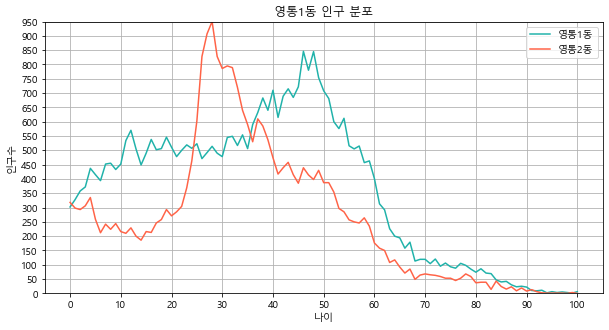

In [42]:
# 2개의 지역의 인구 분포를 line chart 출력
f = open('./population.csv', 'r', encoding='utf-8') # r: read
data = csv.reader(f, delimiter=',') # delimiter: 구분자
next(data) # header

y1 = [] # 간석4동 인구 정보 저장
y2 = [] # 파평면 인구 정보 저장
y1_founded = False
y2_founded = False
for row in data:
    if y1_founded == True and y2_founded == True:
        break
        
    address = row[0] 
    if '영통1동' in address: 
        for cnt in row[3:]:  
            y1.append(int(cnt))
            y1_finded = True
    elif '영통2동' in address: 
        for cnt in row[3:]: 
            y2.append(int(cnt))
            y2_finded = True
            
f.close()

# print(pop1)

x = [i for i in range(0, 101)]   # 0 ~ 100
# [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x_ticks = [i for i in range(min(x), max(x)+10, 10)] # 연령대  
print(x_ticks)

y_ticks = [i for i in range(0, max(y2)+50, 50)] #[0, 50, 100, 150, 200, 250, 300, 350...], 인구 정보
print(y_ticks)

plt.figure(figsize=(10, 5))  # 단위: 인치
plt.plot(x, y1, c='lightseagreen', label='영통1동')
plt.plot(x, y2, c='tomato', label='영통2동')
# plt.axis([10, 50, 0, 20]) # x start, x end, y start, y end
plt.ylim(0, max(y))
plt.title('영통1동 인구 분포')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.xticks(x_ticks)  # x 눈금 label
plt.yticks(y_ticks)  # y 눈금 label
plt.legend()
plt.grid(True)
plt.show()

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]


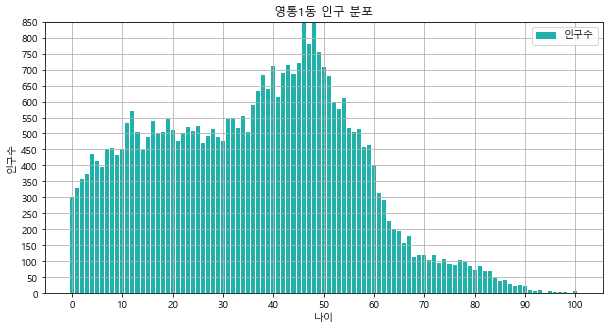

In [43]:
# 현재 살고 있는 지역의 인구 분포를 bar chart 출력(수직 막대 그래프)
f = open('./population.csv', 'r', encoding='utf-8') # r: read
data = csv.reader(f, delimiter=',') # delimiter: 구분자
next(data) # header

y = [] # 순수 인구 정보 저장
for row in data:
    address = row[0] 
    if '영통1동' in address: # == X
        for cnt in row[3:]:  # row: list
            # print(' ', cnt, end='')
            y.append(int(cnt))
        break
        
f.close()

# print(pop1)

x = [i for i in range(0, 101)]   # 0 ~ 100
# [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x_ticks = [i for i in range(min(x), max(x)+10, 10)] # 연령대  
print(x_ticks)

y_ticks = [i for i in range(0, max(y)+50, 50)] #[0, 50, 100, 150, 200, 250, 300, 350...], 인구 정보
print(y_ticks)

plt.figure(figsize=(10, 5))  # 단위: 인치
plt.bar(x, y, color='lightseagreen', label='인구수')
# plt.axis([10, 50, 0, 20]) # x start, x end, y start, y end
plt.ylim(0, max(y))
plt.title('영통1동 인구 분포')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.xticks(x_ticks)  # x 눈금 label
plt.yticks(y_ticks)  # y 눈금 label
plt.legend()
plt.grid(True)
plt.show()

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]


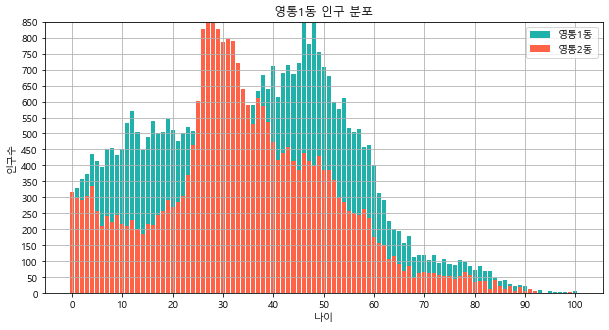

In [45]:
# 2개의 지역의 인구 분포를 bar chart 출력(수직 막대 그래프)
f = open('./population.csv', 'r', encoding='utf-8') # r: read
data = csv.reader(f, delimiter=',') # delimiter: 구분자
next(data) # header

y1 = [] # 간석4동 인구 정보 저장
y2 = [] # 파평면 인구 정보 저장
y1_founded = False
y2_founded = False
for row in data:
    if y1_founded == True and y2_founded == True:
        break
        
    address = row[0] 
    if '영통1동' in address: 
        for cnt in row[3:]:  
            y1.append(int(cnt))
            y1_finded = True
    elif '영통2동' in address: 
        for cnt in row[3:]: 
            y2.append(int(cnt))
            y2_finded = True
            
f.close()

# print(pop1)

x = [i for i in range(0, 101)]   # 0 ~ 100
# [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x_ticks = [i for i in range(min(x), max(x)+10, 10)] # 연령대  
print(x_ticks)

y_ticks = [i for i in range(0, max(y1)+50, 50)] #[0, 50, 100, 150, 200, 250, 300, 350...], 인구 정보
print(y_ticks)

plt.figure(figsize=(10, 5))  # 단위: 인치
plt.bar(x, y1, color='lightseagreen', label='영통1동')
plt.bar(x, y2, color='tomato', label='영통2동')
# plt.axis([10, 50, 0, 20]) # x start, x end, y start, y end
plt.ylim(0, max(y))
plt.title('영통1동 인구 분포')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.xticks(x_ticks)  # x 눈금 label
plt.yticks(y_ticks)  # y 눈금 label
plt.legend()
plt.grid(True)
plt.show()

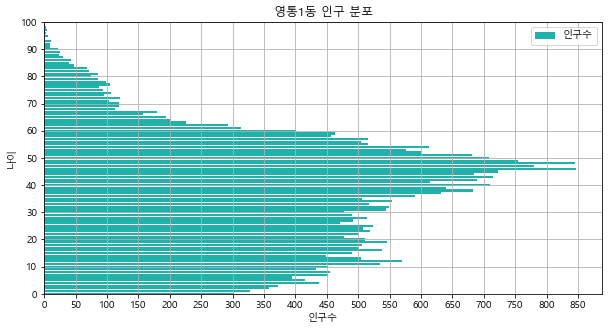

In [46]:
# 현재 살고 있는 지역의 인구 분포를 bar chart 출력(수평 막대 그래프)
# X축에 인구수가 나오도록 변경
f = open('./population.csv', 'r', encoding='utf-8') # r: read
data = csv.reader(f, delimiter=',') # delimiter: 구분자
next(data) # header

y = [] # 변경 없음
for row in data:
    address = row[0] 
    if '영통1동' in address: # == X
        for cnt in row[3:]:  # row: list
            # print(' ', cnt, end='')
            y.append(int(cnt))
        break
        
f.close()

# print(pop1)

# x, y축 tick 정보 변경
x_ticks = [i for i in range(0, max(y)+50, 50)] #[0, 50, 100, 150, 200, 250, 300, 350...], 인구 정보
# print(x_ticks)

age = [i for i in range(0, 101)]   # 0 ~ 100
y_ticks = [i for i in range(min(age), max(age)+10, 10)] # 연령대  
# print(y_ticks)

plt.figure(figsize=(10, 5))  # 단위: 인치
plt.barh(x, y, color='lightseagreen', label='인구수')
# plt.axis([10, 50, 0, 20]) # x start, x end, y start, y end
plt.ylim(0, max(age))
plt.title('영통1동 인구 분포')
plt.xlabel('인구수')
plt.ylabel('나이')
plt.xticks(x_ticks)  # x 눈금 label
plt.yticks(y_ticks)  # y 눈금 label
plt.legend()
plt.grid(True)
plt.show()

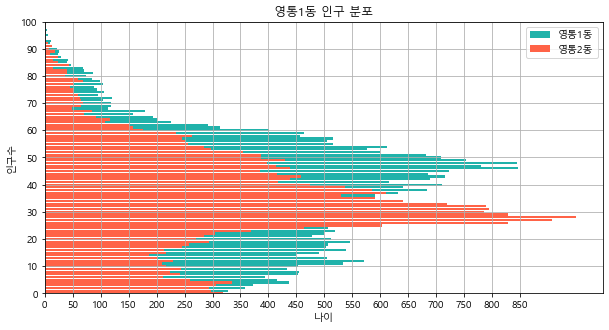

In [47]:
# 영통1동, 영통2동 지역의 인구 분포를 bar chart 출력(수평 막대 그래프)
# X축에 인구수가 나오도록 변경
f = open('./population.csv', 'r', encoding='utf-8') # r: read
data = csv.reader(f, delimiter=',') # delimiter: 구분자
next(data) # header

y1 = [] # 간석4동 인구 정보 저장
y2 = [] # 파평면 인구 정보 저장
y1_founded = False
y2_founded = False
for row in data:
    if y1_founded == True and y2_founded == True:
        break
        
    address = row[0] 
    if '영통1동' in address: 
        for cnt in row[3:]:  
            y1.append(int(cnt))
            y1_finded = True
    elif '영통2동' in address: 
        for cnt in row[3:]: 
            y2.append(int(cnt))
            y2_finded = True
            
f.close()

# print(pop1)

# x, y축 tick 정보 변경
x_ticks = [i for i in range(0, max(y1)+50, 50)] #[0, 50, 100, 150, 200, 250, 300, 350...], 인구 정보
# print(x_ticks)

age = [i for i in range(0, 101)]   # 0 ~ 100
y_ticks = [i for i in range(min(age), max(age)+10, 10)] # 연령대  
# print(y_ticks)

plt.figure(figsize=(10, 5))  # 단위: 인치
plt.barh(x, y1, color='lightseagreen', label='영통1동')
plt.barh(x, y2, color='tomato', label='영통2동')
# plt.axis([10, 50, 0, 20]) # x start, x end, y start, y end
plt.ylim(0, max(age))
plt.title('영통1동 인구 분포')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.xticks(x_ticks)  # x 눈금 label
plt.yticks(y_ticks)  # y 눈금 label
plt.legend()
plt.grid(True)
plt.show()

동면 이름을 입력하세요:영통1동
영통1동의 전체 인구: 36,305 명
남자 인구: 17,929 명
여자 인구: 18,376 명


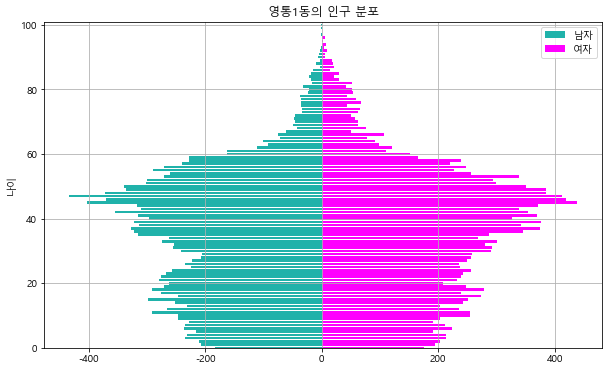

In [48]:
# 남녀 구분의 처리, 동이름을 입력하여 수평 Barh plot 출력
f = open('./gender.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

male = []   # 남자
female = [] # 여자

# 같은 지역명은 주소를 구나 시단위까지 입력 
# 예) 옥산면은 4곳이나 중복됨으로 '부여군 옥산면' 입력.
#     충청북도 청주시 흥덕구 옥산면, 충청남도 부여군 옥산면, 전라북도 군산시 옥산면,
#     경상북도 의성군 옥산면 
name = input('동면 이름을 입력하세요:')
for row in data:
    address = row[0]           # 주소 컬럼
    if name in address:        # 입력받은 주소 검색
        pop_male = int(row[1])          # 남자 전체 인구수
        pop_female = int(row[104])      # 여자 전체 인구수
        pop_tot = pop_male + pop_female # 동의 전체 인구
        
        for su in row[3:104]: # 3 ~ 103 # 연령별 남자 인구
            male.append(-int(su))       # 0을 기준으로 음수 영역, 부호를 마이너스로 변경
        for su in row[106:]:            # 106 ~  마지막까지, 연령별 여자인구
            female.append(int(su))      # 0을 기준으로 양수 영역, 플러스

        break;                    

print('{0}의 전체 인구: {1:,} 명'.format(name, pop_tot))
print('남자 인구: {0:,} 명'.format(pop_male))
print('여자 인구: {0:,} 명'.format(pop_female))

plt.figure(figsize=(10, 6))
plt.barh(range(101), male, color='lightseagreen', label='남자')
plt.barh(range(101), female, color='fuchsia', label='여자')
plt.title(name + '의 인구 분포')
# plt.xlabel('나이')
plt.ylabel('나이')
plt.legend()
plt.grid(True)
plt.ylim(0, 101)
plt.show()            
f.close()

동면 이름을 입력하세요:영통2동
영통2동의 전체 인구: 27,600 명
남자 인구: 14,597 명
여자 인구: 13,003 명


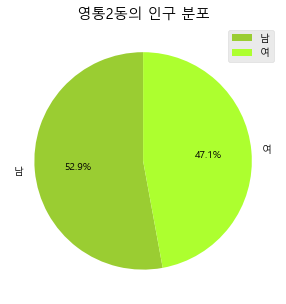

In [51]:
# 읍면동을 입력받아 남녀 비율을 pie 챠트로 출력하시오.
f = open('./gender.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)
male = []   # 남자
female = [] # 여자

# 같은 지역명은 주소를 구나 시단위까지 입력 
# 예) 옥산면은 4곳이나 중복됨으로 '부여군 옥산면' 입력.
name = input('동면 이름을 입력하세요:')
for row in data:
    address = row[0]
    if name in address: 
        pop_male = int(row[1]) # 남자 전체 인구수
        pop_female = int(row[104]) # 여자 전체 인구수
        pop_tot = pop_male + pop_female # 동의 전체 인구
        
        for su in row[3:104]: # 3 ~ 103
            male.append(-int(su)) # 0을 기준으로 음수 영역
        for su in row[106:]: # 106 ~  마지막까지
            female.append(int(su)) # 0을 기준으로 양수 영역
            
        break;        

print('{0}의 전체 인구: {1:,} 명'.format(name, pop_tot))
print('남자 인구: {0:,} 명'.format(pop_male))
print('여자 인구: {0:,} 명'.format(pop_female))

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))

area = [] # pie plot area
area.append(pop_male)   # 남자 전체 인구수
area.append(pop_female) # 여자 전체 인구수

label = ['남', '여']
color = ['yellowgreen', 'greenyellow']
# autopct='%.1f%%': pie 챠트의 값 출력 형식
# startangle=90: 시작각이 오른쪽 기준 90도
plt.pie(area, colors=color, labels=label, autopct='%.1f%%',
        startangle=90)

plt.title(name + '의 인구 분포')
plt.legend()
plt.show()            
f.close()

동면동 이름을 입력하세요:영통2동
영통2동의 전체 인구: 27,600 명
남자 인구: 14,597 명
여자 인구: 13,003 명
남자: [14, 16, 7, 18, 9, 5, 8, 3, 5, 4, 2, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0]
여자: [27, 25, 7, 27, 18, 11, 14, 6, 15, 5, 13, 3, 4, 0, 0, 1, 1, 0, 2, 0, 1]


C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


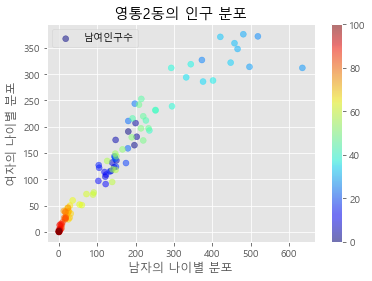

In [52]:
# Scatter, colorbar의 출력
# 읍면동을 입력받아 남녀수를 점선 그래프로 출력하시오.
f = open('./gender.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
next(data)    # header skip
male = []     # 남자 인구수 저장
female = []   # 여자 인구수 저장
# 옥산면은 4곳임으로 군단위까지 입력: 부여군 옥산면
name = input("동면동 이름을 입력하세요:") 
for row in data: # "서울특별시 구로구 신도림동(1153051000)",...
    address = row[0]
    if name in address:
        pop_male = int(row[1])          # 남자 전체 인구수
        pop_female = int(row[104])      # 여자 전체 인구수
        pop_tot = pop_male + pop_female # 동의 전체 인구
        
        for su in row[3:104]: # 3 ~ 103 포함
            male.append(int(su))
        for su in row[106:]: # 106 ~ 나머지 포함
            female.append(int(su))
        break;    

print('{0}의 전체 인구: {1:,} 명'.format(name, pop_tot))
print('남자 인구: {0:,} 명'.format(pop_male))
print('여자 인구: {0:,} 명'.format(pop_female))

plt.figure(figsize=(6, 4))

# 0 ~ 100세이상 순차적으로 대응, 0 ~ 9세까지만 확인
print('남자:', male[80:])
print('여자:', female[80:])
# c=range(101): 0세 ~ 100세
plt.scatter(male, female, label='남여인구수', c=range(101), 
            alpha=0.5, cmap='jet')
plt.title(name + '의 인구 분포')
plt.xlabel('남자의 나이별 분포')
plt.ylabel('여자의 나이별 분포')
plt.legend()
plt.grid(True)
# plt.ylim(0, 900)
plt.colorbar()
plt.show()            
f.close()
# 80세 이상에서 그래프의 경사가 높아짐으로 여자가 남자에 비하여 인원수가 많음.